---
# Esercitazione 9
---
## 09.1 TSP: The Salesman Problem solved with Genetic Algorithm
TSP consiste nel trovare il percorso più breve che un venditore deve fare per visitare N città (ciascuna in posizione $\vec{c}_i$), partendo dalla prima e tornando alla prima, visitando tutte le altre una sola volta. $\\$
In questa esercitazione verrà risolto il problema mediante l'utilizzo di un algoritmo genetico (GA) e utilizzando come funzione costo la distanza $L^{(1)}$ compiuta dal venditore:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

Ogni possibile percorso consiste in una permutazione dell'ordine delle città visitate. Un modo comodo per visualizzare il problema è infatti quello di rappresentare ogni città come l'elemento di un vettore 1D, nella quale sono riportati gli indici che identificano le città, e la cui sequenza è dunque l'ordine con cui visitarle.

Il problema è stato trattato fissando $N=34$ città, posizionandole casualmente sia all'interno di un quadrato che lungo una circonferenza. L'algoritmo GA è stato eseguito in modo da generare $G=500$ generazioni.

Una volta estratte le posizioni casuali delle città, il codice crea una popolazione di $M=500$ configurazioni (individuals), a partire da permutazioni casuali della prima sequenza (quella numericamente ordinata), e mantenendo le condizioni al contorno (la prima città resta al primo e all'ultimo posto della sequenza e le altre si ripetono una sola volta nella sequenza).

Per eseguire l'Algoritmo Genetico è stato implementato un estrattore basato sull'algoritmo della roulette wheel selection. L'estrazione di una specifica sequenza risulta dunque proporzionale all'inverso della distanza totale percorsa. In questo modo vengono favorite le sequenza che minimizzano la funzione costo e che quindi si avvicinano alla soluzione.

Ogni nuova generazione viene creata a partire da quella precedente, selezionando (con il selettore sopracitato) un numero $M$ di sequenze all'interno di quest'ultima popolazione. Alla fine della selezione si ottiene dunque una nuova popolazione di pari dimensioni. $\\$
Per ogni sequenza selezionata si ha una probabilità $p^{(i)}_m$ che essa venga mutata, con $4$ diverse mutazioni ($i=1,...,4$) elencate di seguito. Le mutazioni rispettano tutte le condizioni al contorno del problema:
1. Pair permutation: viene estratto un indice casuale $m \in [2, N-1]$, per poi invertire l'$m$-esima città con la successiva $m+1$-esima. Da ciò deriva il fatto che $m+1 \leq N$. $\\$
es. se $m=3$ si ha $\left[ 1, 2, (3, 4), 5 \right] \to \left[ 1, 2, (4, 3), 5 \right]$
2. $n$-Shift di $m$ elementi: vengono estratti due indici, $n$ indica di quanto traslare la sequenza verso destra, $m$ indica la sequenza delle prime $m$ città a cui applicare la traslazione. Per ottenere una mutazione valida e che non faccia riottenere la configurazione iniziale (a causa della sua periodicità) dev'essere $m \in [2, N-1]$ (posso traslare minimo le prime $2$ città oltre la prima e massimo le prime $N-1$ città oltre la prima) e $n \in [1, m-1]$ (altrimeni non rimango nella sottosequenza dei primi m elementi oppure resterebbe invariata). $\\$
es. se $m=3$ e $n=2$ si ha $\left[ 1, (2, 3, 4), 5 \right] \to \left[ 1, (3, 4, 2), 5 \right]$
3. $m$-tuple permutation: viene estratto un indice $m$ che rappresenta il numero di città consecutive da scambiare con le successive $m$ città. In questo caso $m \in [1, N/2)$ (altrimenti non avrei la seconda successione per scambiarle). $\\$
es. se $m=2$ si ha $\left[ 1, (2, 3), (4, 5) \right] \to \left[ 1, (4, 5), (2, 3) \right]$
4. Inversion: estraggo un indice $m$ che rappresenta il numero di città consecutive oltre la prima da invertire. In questo caso dev'essere $m \in [2, N-2]$ (o resterebbe invariata). $\\$
es. se $m=3$ si ha $\left[ 1, (2, 3, 4), 5 \right] \to \left[ 1, (4, 3, 2), 5 \right]$.

Per ogni sequenza estratta dalla popolazione precedente ognuna delle mutazioni può esservi applicata, prima di venire inserita come nuovo elemento della nuova generazione.<br>
Applicando ogni mutazione non è garantito che la successione figlia (mutata) abbia una distanza inferiore rispetto alla successione di partenza, e sia dunque migliore. Nonostante ciò, nell'algoritmo è stata inserita un'ulteriore probabilità del $50\%$ che questa venga comunque accettata e aggiunta alla generazione successiva; questo per evitare di finire in minimi locali. Le successioni che riducono la distanza vengono invece sempre accettate.

Di seguito sono mostrate le due disposizioni casuali delle città, collegandole in ordine numerico.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
# Sono variabili globali
X_C, Y_C = np.loadtxt("./data_pm20_pc0_I500/Circle/Positions.dat", unpack= True, usecols=(1,2), skiprows=1)
X_S, Y_S = np.loadtxt("./data_pm20_pc0_I500/Square/Positions.dat", unpack= True, usecols=(1,2), skiprows=1)

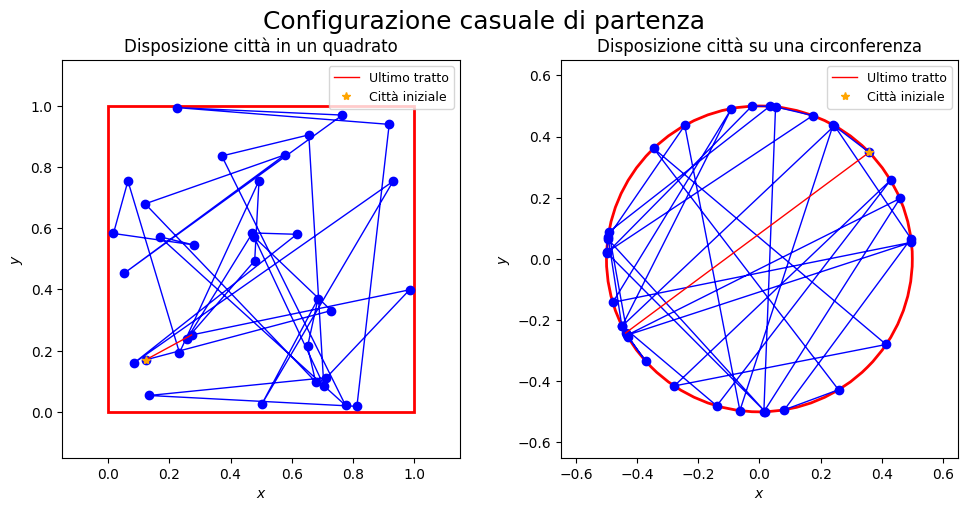

In [2]:

# Creazione dei subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle("Configurazione casuale di partenza", size=18)

# Creazione del quadrato
square = plt.Rectangle((0, 0), 1, 1, fill=False, color='red', lw=2)
ax1.add_patch(square)
# ax1.scatter(X_S, Y_S, color='blue')
ax1.plot(X_S, Y_S, color='blue', marker="o", lw=1)
ax1.plot([X_S[-1], X_S[0]], [Y_S[-1], Y_S[0]], color='red', lw=1, label="Ultimo tratto")

ax1.plot(X_S[0], Y_S[0], "*", color='orange', label = "Città iniziale")
ax1.set_xlim(-0.15, 1.15)
ax1.set_ylim(-0.15, 1.15)
ax1.set_aspect('equal')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_title('Disposizione città in un quadrato')
ax1.legend(loc='upper right', prop={'size': 9})

# Creazione del cerchio
circle = plt.Circle((0, 0), 0.5, fill=False, color='red', lw=2)
ax2.add_patch(circle)
# ax2.scatter(X_C, Y_C, color='red')
ax2.plot(X_C, Y_C, color='blue', marker="o", lw=1)
ax2.plot([X_C[-1], X_C[0]], [Y_C[-1], Y_C[0]], color='red', lw=1, label="Ultimo tratto")

ax2.plot(X_C[0], Y_C[0], "*", color='orange',label = "Città iniziale")
ax2.set_xlim(-0.65, 0.65)
ax2.set_ylim(-0.65, 0.65)
ax2.set_aspect('equal')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.set_title('Disposizione città su una circonferenza')
ax2.legend(loc='upper right', prop={'size': 9})

# Mostrare i subplot
plt.tight_layout()
plt.show()


Il numero di individual impostato per ogni popolazione e il numero di generazioni è stato scelto dopo diversi tentativi (nello specifico, un numero troppo ridotto di configurazioni per generazione comporta la non convergenza del sistema, anche dopo diverse centinaia di generazioni). Tali valori sono rispettivamente $I=500$ e $G=500$.

Per ognuna delle $G$ generazioni viene calcolato il valor medio delle distanze tra la metà delle distanze minori delle $M$ sequenze, questo per una ragione estetica di rappresentazione dei risultati.<br>
Viene qui riportato il primo risultato, imponendo $p^{(i)}_m = 20\%$ per ogni mutazione. Nella seconda fase verrà introdotto un operatore di Crossover, che verrà selezionato con una probabilità $p_c$ e la cui spiegazione è svolta in seguito.

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def lower_gen(distances: np.ndarray) -> list:
    """
    Funzione che prende il file letto da NumPy,
    carica ogni riga in una lista (le distanze di ogni generazione),
    e ritorna la prima metà di distanze
    """
    # Salvo ogni riga in una lista, corrisponde alle diverse generazioni
    generations = [list(row) for row in distances]
    dim = len(generations[0])
    # ordino le distanze per ogni generazione
    # for i in range(len(generations)): # NON serve perché lo fa già il codice C++
    #     generations[i].sort()
    generations = [row[:int(dim/2)] for row in generations]
    return generations


def PlotAveDist(distances_c: np.ndarray, distances_s: np.ndarray, title: str, quad_ylim = (5,7), circ_ylim = (3,6)) -> None:
    """
    Funzione che crea il grafico delle distanze per le due configurazioni (cerchio e quadrato)
    al crescere delle generazioni. La distanza plottata è la media della prima metà di distanze più
    corte tra gli individual di una generazione insieme alla distanza minima di ogni generazione
    """

    generation_c = lower_gen(distances_c)
    generation_s = lower_gen(distances_s)

    min_dist_c = min(min(generation_c))
    min_dist_s = min(min(generation_s))

    print(f"Dist min cerchio: {min_dist_c}")
    print(f"Dist min quadrato: {min_dist_s}")

    x = np.arange(1, len(generation_c)+1)              #  x del grafico, numero della generazione
    av_dist_c = [np.mean(gen) for gen in generation_c] # distanza media per generazione sul cerchio
    av_dist_s = [np.mean(gen) for gen in generation_s] # distanza media per generazione nel quadrato

    m_dist_s = [min(gen) for gen in generation_s] # distanza minima per generazione
    m_dist_c = [min(gen) for gen in generation_c] # distanza minima per generazione


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    plt.suptitle(title, size=16)

    # grafico per la configurazione nel quadrato
    ax1.plot(x, av_dist_s, color='blue', label="Distanza media")
    ax1.scatter(x, m_dist_s, color="orange", s=3, label="Distanza minima per generazione")

    ax1.set_ylim(quad_ylim[0], quad_ylim[1])
    ax1.set_xlabel('Generazioni', size=10)
    ax1.set_ylabel(r"$\langle L^{(1)} \rangle$", size=10)
    ax1.set_title(r"$\langle L^{(1)} \rangle$ all'aumentare delle generazioni (quadrato)", size=12)
    ax1.legend()
    ax1.grid()

    # grafico per la configurazione sul cerchio
    ax2.plot(x, av_dist_c, color='blue', label="Distanza media")
    ax2.scatter(x, m_dist_c, color="orange", s=3, label="Distanza minima per generazione")

    ax2.set_ylim(circ_ylim[0], circ_ylim[1])
    ax2.set_xlabel('Generazioni', size=10)
    ax2.set_ylabel(r"$\langle L^{(1)} \rangle$", size=10)
    ax2.set_title(r"$\langle L^{(1)} \rangle$ all'aumentare delle generazioni (cerchio)", size=12)
    ax2.legend()
    ax2.grid()

    plt.tight_layout()
    plt.show()

In [9]:
def sequences_extractor(path: str) -> list:
    """
    Legge il file con le sequenze minime per generazione e restituisce una lista di dizionari,
    in cui in ognuno vi è la distanza e la sequenza.
    """
    with open(path) as seqFile:
        rows = seqFile.readlines()
        # contiene le sequenze di ogni popolazione, per ogni generazione (lista di liste di sequenze)
        gen_seq = []
        # per ogni riga letta dal file
        gen_seq = [{"distance": float(row.split()[0]), "sequence": row.split()[1],} for row in rows]
    return gen_seq


def min_sequence(sequences: list, shape=1) -> dict:
    """Estrae la configurazione con la distanza minore e la sua distanza"""
    min_dist = min(sequences, key=lambda x: x["distance"])
    if shape:
        print(f"Dist min cerchio: {min_dist['distance']}")
        print(f"Sequenza: {min_dist['sequence']}")
    else:
        print(f"Dist min quadrato: {min_dist['distance']}")
        print(f"Sequenza: {min_dist['sequence']}")
    return min_dist

In [10]:
def path_plotter(sequence_dict_c:dict, sequence_dict_s:dict):
    """Funzione che disegna le sequenze di città nel quadrato e sul cerchio"""
    sequence_c = sequence_dict_c["sequence"].split("-")
    sequence_s = sequence_dict_s["sequence"].split("-")

    sequence_c = [int(index) for index in sequence_c]
    sequence_s = [int(index) for index in sequence_s]


    # Creazione dei subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Creazione del quadrato
    square = plt.Rectangle((0, 0), 1, 1, fill=False, color='red', lw=2)
    ax1.add_patch(square)
    # ax1.scatter(X_S, Y_S, color='blue')

    # creazione linee nell'ordine
    for i in range(len(sequence_s)):
        # indice attuale
        att = sequence_s[i]-1
        # indice precendete
        prec = sequence_s[i-1]-1
        ax1.plot([X_S[prec], X_S[att]], [Y_S[prec], Y_S[att]], color='blue', marker="o", lw=1)

    ax1.plot(0, 0, linewidth=1, label=r'$L^{(1)}_{min} = %.3f $' %(sequence_dict_s["distance"]), color="white")

    ax1.plot(X_S[0], Y_S[0], "*", color='orange', label = "Città iniziale")
    ax1.set_xlim(-0.15, 1.15)
    ax1.set_ylim(-0.15, 1.15)
    ax1.set_aspect('equal')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title('Disposizione città in un quadrato')
    ax1.legend(loc='upper right', prop={'size': 9})

    # Creazione del cerchio
    circle = plt.Circle((0, 0), 0.5, fill=False, color='red', lw=2)
    ax2.add_patch(circle)
    # ax2.scatter(X_C, Y_C, color='red')

    # creazione linee nell'ordine
    for i in range(len(sequence_c)):
        # indice attuale
        att = sequence_c[i]-1
        # indice precendete
        prec = sequence_c[i-1]-1
        ax2.plot([X_C[prec], X_C[att]], [Y_C[prec], Y_C[att]], color='blue', marker="o", lw=1)

    ax2.plot(0, 0, linewidth=1, label=r'$L^{(1)}_{min} = %.3f $' %(sequence_dict_c["distance"]), color="white")

    ax2.plot(X_C[0], Y_C[0], "*", color='orange',label = "Città iniziale")
    ax2.set_xlim(-0.65, 0.65)
    ax2.set_ylim(-0.65, 0.65)
    ax2.set_aspect('equal')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_title('Disposizione città su una circonferenza')
    ax2.legend(loc='upper right', prop={'size': 9})

    # Mostrare i subplot
    plt.tight_layout()
    plt.show()


Dist min cerchio: 3.81553
Dist min quadrato: 7.52756


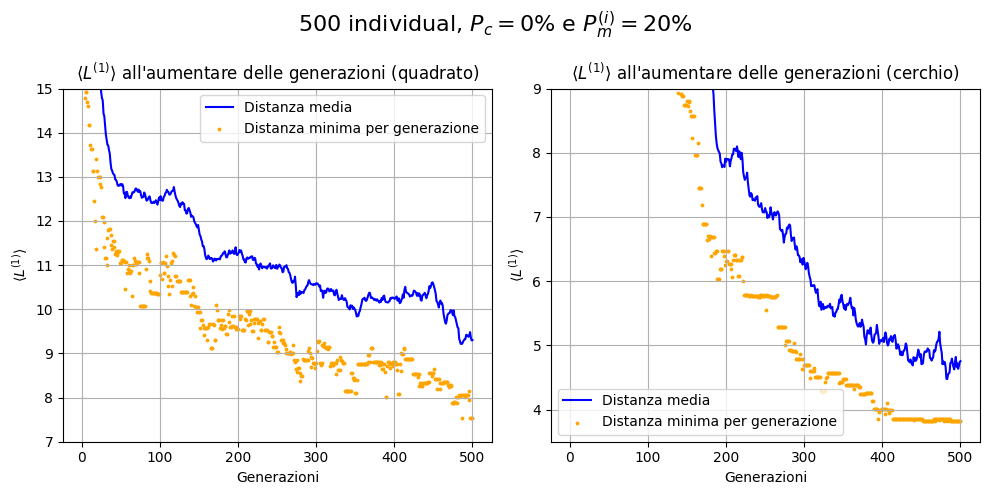

Dist min cerchio: 3.81553
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-16-34-20-32-31-27-25-28-18-6-5-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 7.52756
Sequenza: 1-12-34-8-9-24-10-26-33-19-27-29-5-25-13-14-3-16-11-28-6-17-21-32-23-20-30-7-4-22-2-31-15-18-1


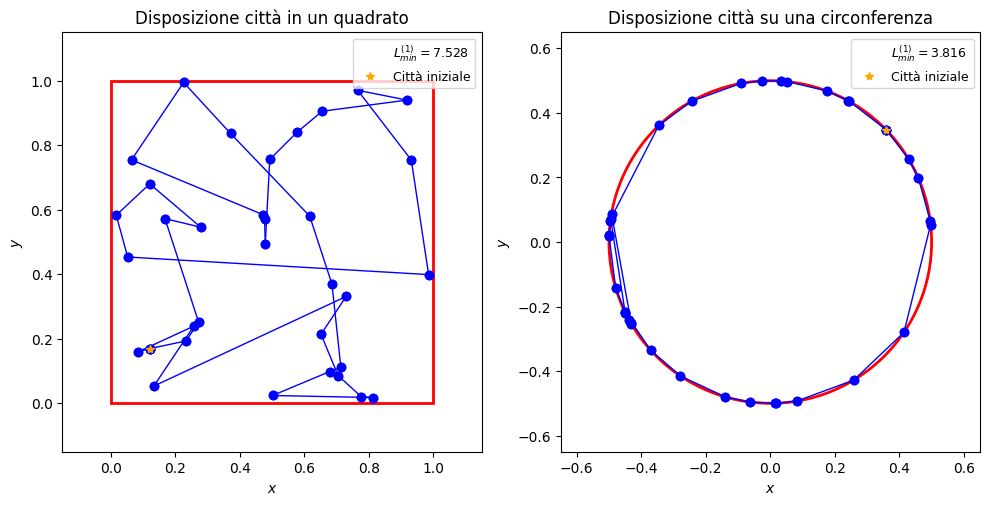

In [14]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc0I500_c = np.loadtxt("./data_pm20_pc0_I500/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc0I500_s = np.loadtxt("./data_pm20_pc0_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc0I500_c, distances_Pm20Pc0I500_s, "500 individual, $P_{c}=0 \%$ e $P^{(i)}_m = 20 \%$", quad_ylim = (7, 15), circ_ylim=(3.5, 9))

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc0I500_c = min_sequence(sequences_extractor("./data_pm20_pc0_I500/Circle/minSequences.dat"))
min_seq_Pm20Pc0I500_s = min_sequence(sequences_extractor("./data_pm20_pc0_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc0I500_c, min_seq_Pm20Pc0I500_s)


Dai grafici ottenuti si può notare che già dalle prime generazioni vi è una riduzione della distanza misurata. Infatti, la selezione di individui per costruire la generazione successiva favorisce quelli a distanza minore.
Tuttavia, dal plot delle sequenze ottenute è possibile notare che sicuramente le distanze non sono minimizzate, infatti vi sono diverse ripetizioni tra città adiacenti e non. <br>
Probabilemente, l'algoritmo non riesce a convergere perché una mutazione casuale applicata ad una buona sequenza ha buone probabilità di peggiorarla. Per questo motivo è lecito introdurre una nuova operazione: il crossover.

### Introduzione dell'operatore di crossover
L'operatore di crossover è in grado di unire due sequenze genitori in una sequenza figlia:<br>
Presa una prima sequenza, essa viene spezzata ad una lunghezza casuale che identifichiamo con $m$. Si seleziona una seconda sequenza, il secondo genitore, che viene spezzata alla stessa lunghezza. L'ultimo passaggio consiste nell'unire l'inizio della prima con la fine della seconda, originando così due sequenze figlie.<br>
Si osservi che le condizioni al contorno sono rispettate solo se le prime $m$ città di entrambe le sequenze sono uguali (anche non in ordine).

Date due sequenze genitore, ad es. 
$$
\left[ 1, 2, 3, 4, 5, 6, 7, 8, 9 \right]\\
\left[ 1, 3, 4, 2, 5, 7, 6, 9, 8 \right] 
$$
1. Esse vengono tagliate ad una distanza casuale, ad esempio $m=4$:
$$
\left[ 1, 2, 3, 4 | 5, 6, 7, 8, 9 \right]\\
\left[ 1, 3, 4, 2 | 9, 7, 6, 5, 8 \right] 
$$
2. Le due seconde metà vengono scambiate:
$$
\left[ 1, 2, 3, 4 | 5, 7, 6, 9, 8 \right]\\
\left[ 1, 3, 4, 2 | 5, 6, 7, 8, 9 \right] 
$$
Si originano così due sequenza diverse. Si osservi che per queste sequenze d'esempio è possibile mantenere le condizioni al contorno per $m=1,2,3,4$, negli altri casi scambiando le diverse metà si ottengono ripetizioni di alcune città.<br>
Nell'algoritmo introdotto, il caso $m=N_{cities}-1$ oppure $m=2$ viene sempre escluso in quanto sicuramente dà origine a sequenze figlie identiche ai genitori, e questo non sarebbe evolutivo per l'individuo figlio.

La potenzialità del crossover consiste nell'unire l'inizio e la fine di due sequenze, aumentando le probabilità che questa unione dia una configurazione ancora migliore. Ad esempio, il primo genitore potrebbe essere ottimo nelle sequenze iniziali, mentre il secondo in quelle finali. L'utilizzando nell'algoritmo delle sole mutazioni non ha questa particolarità, e la ricerca di una buona sequenza è puramente randomica.

Dato che il crossover tra due sequenze selezionate non avviene a priori ma solo sotto certe condizioni, il secondo genitore candidato viene preso a partire dal primo individual della popolazione precedente, in ordine crescente di distanza. L'algoritmo utilizzato testa la possibilità di eseguire il crossover tra questi due, e in caso negativo avviene un altro tentativo selezionando il secondo individual della popolazione, e poi a seguire provando gli altri (finché non avviene).<br>
Per fare in modo che il secondo genitore sia una buona configurazione con cui eseguire il crossover, ogni popolazione viene riordinata in ordine crescente, in modo che i canditati selezionati siano sempre buoni. 

In analogia con quanto introdotto per le mutazioni, anche per il crossover vi è una probabilità di sopravvivenza del 50% di mantenere le configurazioni figlie anche se sono più lunghe del genitore.<br>
Per semplicità di esecuzione, il primo figlio viene sempre aggiunto, mentre il secondo, se dovesse risultare più lungo del primo genitore, viene aggiunto con questa probabilità.

Una considerazione riguardo le sequenze è che la presenza di un'intersezione tra segmenti comporta che sicuramente essa non minimizza la distanza percorsa. Infatti, l'intreccio comporta che il nostro viaggiatore sia costretto a "tornare indietro", allungando la distanza. In presenza di un risultato in cui l'algoritmo trova sequenze con intersezioni verrà detto che esso "non converge".

Di seguito vengono mostrati i risultati con $500$ individui per $500$ generazioni, $p^{(i)}_{m}=20\%$ e $p_{c}=90\%$.

Dist min cerchio: 3.20321
Dist min quadrato: 5.0727


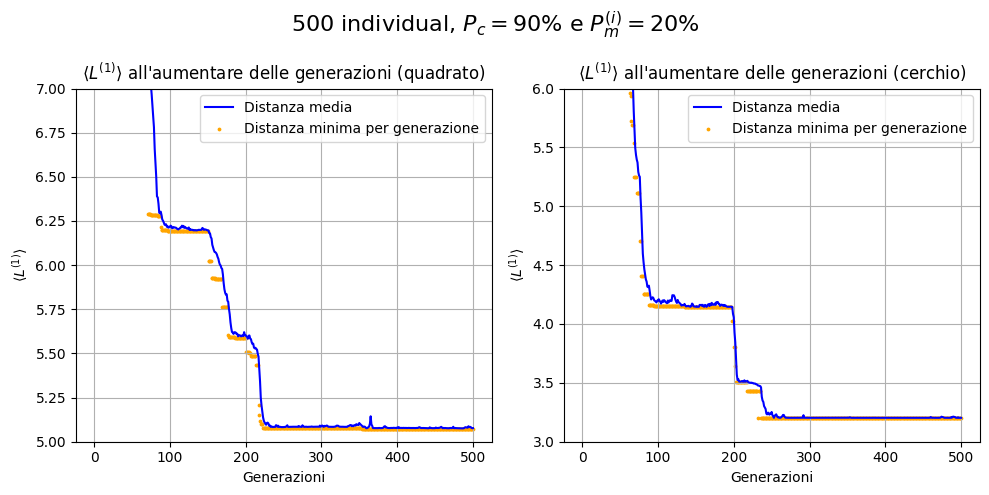

Dist min cerchio: 3.20321
Sequenza: 1-15-2-24-23-30-29-17-4-11-31-5-27-25-28-18-32-20-34-16-6-33-9-7-3-22-26-13-12-10-19-14-21-8-1
Dist min quadrato: 5.0727
Sequenza: 1-12-15-34-26-10-11-24-8-9-14-3-16-17-13-6-28-25-5-27-29-19-33-2-21-22-32-30-7-4-23-20-31-18-1


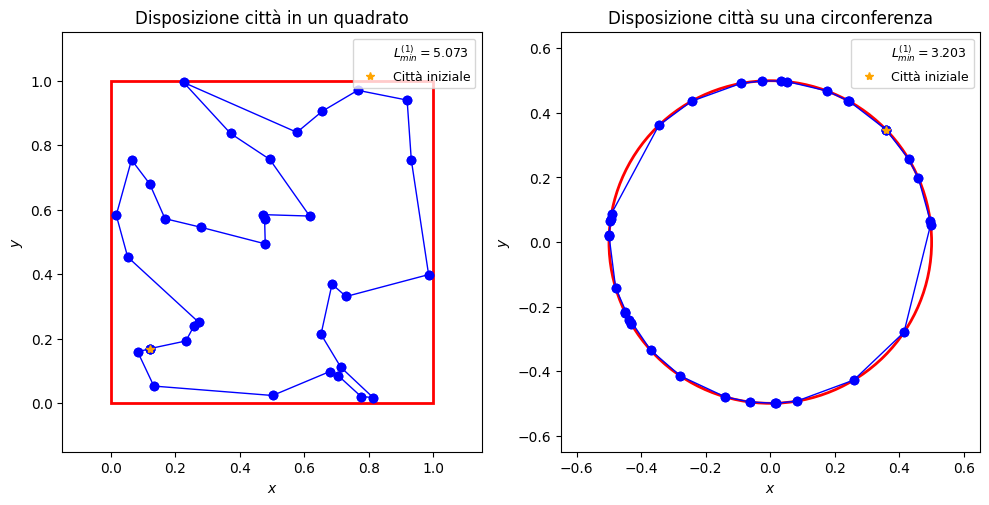

In [15]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc90I500_c = np.loadtxt("./data_pm20_pc90_I500/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc90I500_s = np.loadtxt("./data_pm20_pc90_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc90I500_c, distances_Pm20Pc90I500_s,"500 individual, $P_{c}=90\%$ e $P^{(i)}_m = 20 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc90I500_c = min_sequence(sequences_extractor("./data_pm20_pc90_I500/Circle/minSequences.dat"))
min_seq_Pm20Pc90I500_s = min_sequence(sequences_extractor("./data_pm20_pc90_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc90I500_c, min_seq_Pm20Pc90I500_s)


Si può notare che a parità di probabilità di mutazione, generazioni e numero di individui, l'aggiunta del crossover fa ora convergere il problema. Dal grafico superiore è possibile stimare che la convergenza avviene dopo circa $250$ generazioni per la configurazione a cerchio e circa $220$ per quella nel quadrato.<br>
La distanza minima sul cerchio è compatibile con il valore della circonferenza, essendo questa di raggio 0.5.

Per osservare gli effetti delle mutazioni, di seguito vengono mostrati i risultati variando la probabilità di mutazione al $25\%$, $15\%$, $10\%$ e $5\%$.

Dist min cerchio: 3.12153
Dist min quadrato: 5.41282


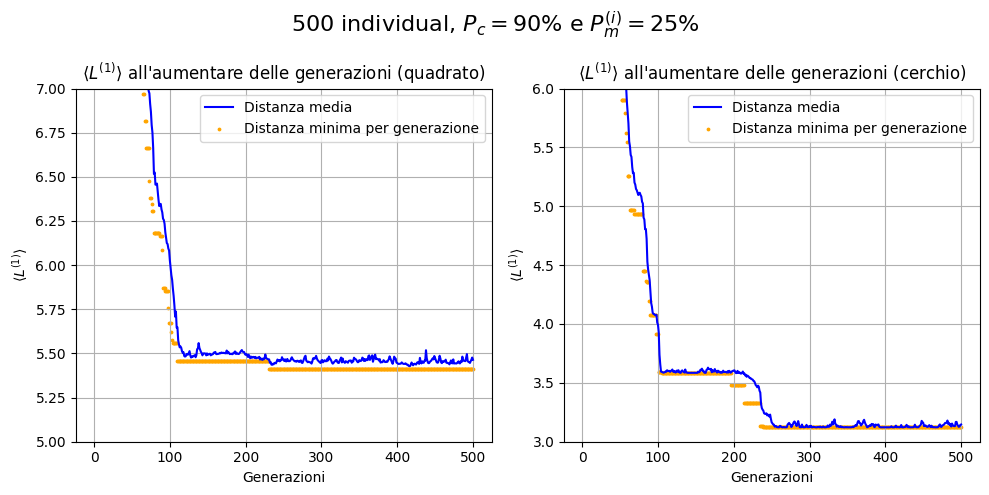

Dist min cerchio: 3.12153
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-32-20-34-16-6-18-28-25-27-5-31-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 5.41282
Sequenza: 1-12-15-34-9-8-26-10-24-11-28-6-25-5-19-29-27-13-16-3-14-17-33-2-21-22-23-32-4-30-7-20-31-18-1


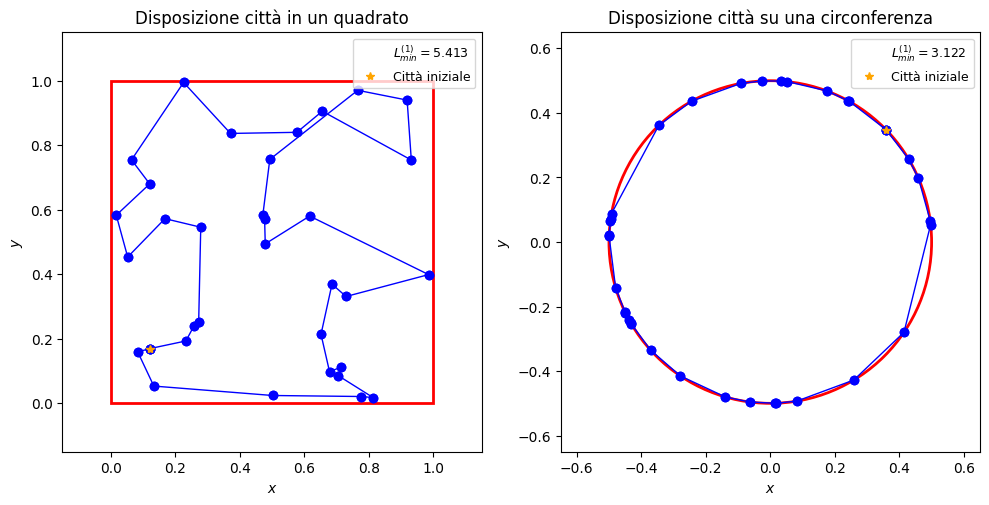

In [16]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm25Pc90I500_c = np.loadtxt("./data_pm25_pc90_I500/Circle/Distances.dat", skiprows=1)
distances_Pm25Pc90I500_s = np.loadtxt("./data_pm25_pc90_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm25Pc90I500_c, distances_Pm25Pc90I500_s,"500 individual, $P_{c}=90\%$ e $P^{(i)}_m = 25 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm25Pc90I500_c = min_sequence(sequences_extractor("./data_pm25_pc90_I500/Circle/minSequences.dat"))
min_seq_Pm25Pc90I500_s = min_sequence(sequences_extractor("./data_pm25_pc90_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm25Pc90I500_c, min_seq_Pm25Pc90I500_s)


In questo primo caso, $p_m=25\%$, si può notare che la configurazione nel quadrato non è riuscita a convergere, mentre quella sul cerchio sì, e circa nello stesso numero di generazioni. Tuttavia è interessante notare che le fluttuazioni delle distanze sono aumentate (grafico blu). Ciò è da attribuire alla correlazione tra randomicità e mutazioni.

Dist min cerchio: 3.69548
Dist min quadrato: 5.39057


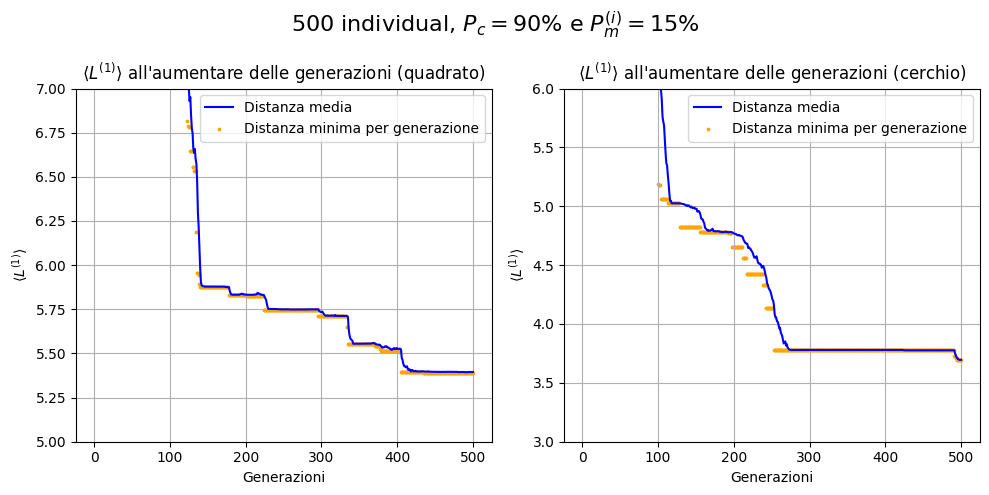

Dist min cerchio: 3.69548
Sequenza: 1-15-2-24-23-30-29-17-4-11-31-5-6-27-25-28-18-16-34-20-32-33-9-7-3-22-26-13-12-10-19-14-21-8-1
Dist min quadrato: 5.39057
Sequenza: 1-12-15-34-26-10-11-24-8-9-16-3-14-21-2-17-13-6-28-25-5-27-29-19-33-22-32-30-7-4-23-20-31-18-1


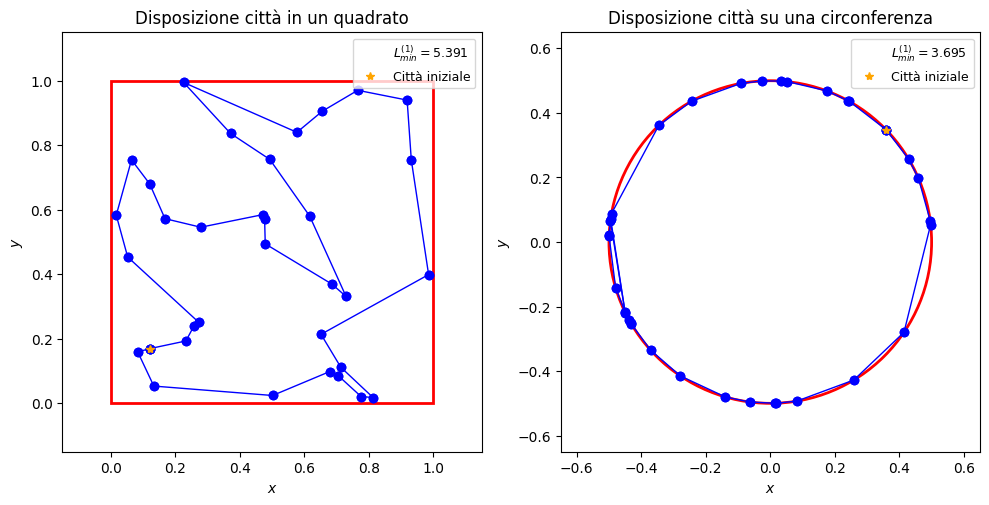

In [17]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm15Pc90I500_c = np.loadtxt("./data_pm15_pc90_I500/Circle/Distances.dat", skiprows=1)
distances_Pm15Pc90I500_s = np.loadtxt("./data_pm15_pc90_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm15Pc90I500_c, distances_Pm15Pc90I500_s,"500 individual, $P_{c}=90\%$ e $P^{(i)}_m = 15 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm15Pc90I500_c = min_sequence(sequences_extractor("./data_pm15_pc90_I500/Circle/minSequences.dat"))
min_seq_Pm15Pc90I500_s = min_sequence(sequences_extractor("./data_pm15_pc90_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm15Pc90I500_c, min_seq_Pm15Pc90I500_s)


Nel caso di configurazioni nel quadrato si osserva una singolarità: il percorso trovato non ha segmenti che si sovrappongono, quindi la sequenza non è scartabile a priori. Tuttavia la distanza ottenuta non è la più piccola trovata finora. <br>
Nel caso del cerchio si osserva invece che l'algoritmo non è riuscito a convergere.

Dist min cerchio: 3.12153
Dist min quadrato: 5.0963


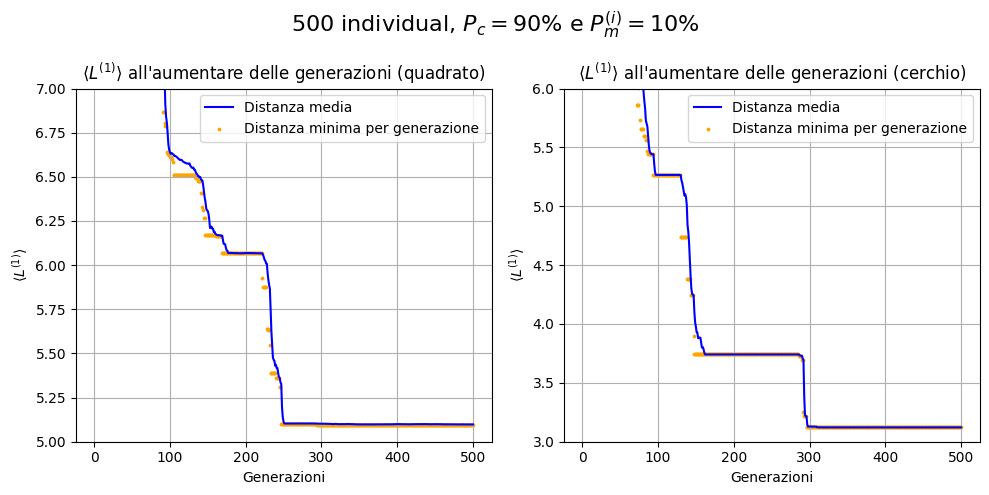

Dist min cerchio: 3.12153
Sequenza: 1-15-2-24-23-30-29-17-4-11-31-5-27-25-28-18-6-16-34-20-32-33-9-7-3-22-26-13-12-10-19-14-21-8-1
Dist min quadrato: 5.0963
Sequenza: 1-12-15-34-26-10-8-9-24-11-28-6-16-3-14-17-13-25-5-27-29-19-33-2-21-22-32-30-7-4-23-20-31-18-1


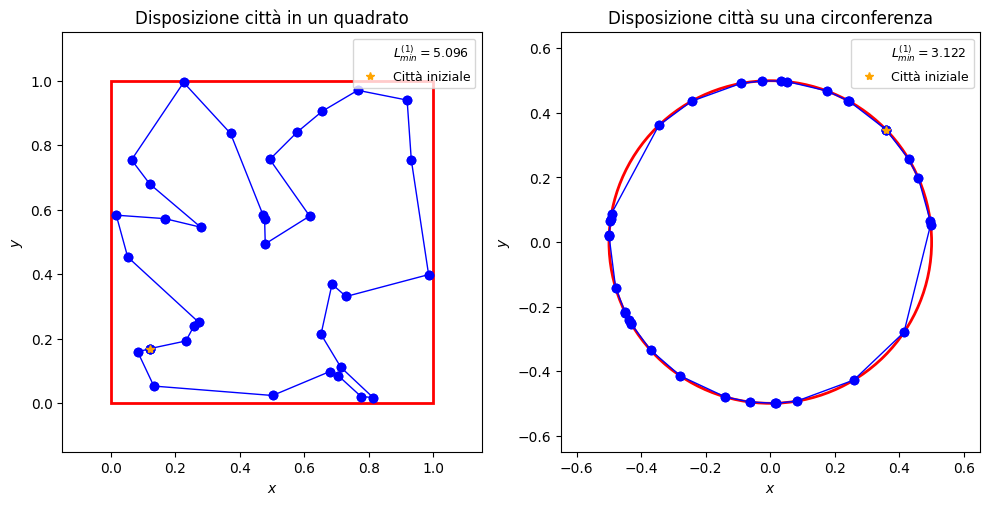

In [18]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm10Pc90I500_c = np.loadtxt("./data_pm10_pc90_I500/Circle/Distances.dat", skiprows=1)
distances_Pm10Pc90I500_s = np.loadtxt("./data_pm10_pc90_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm10Pc90I500_c, distances_Pm10Pc90I500_s,"500 individual, $P_{c}=90\%$ e $P^{(i)}_m = 10 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm10Pc90I500_c = min_sequence(sequences_extractor("./data_pm10_pc90_I500/Circle/minSequences.dat"))
min_seq_Pm10Pc90I500_s = min_sequence(sequences_extractor("./data_pm10_pc90_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm10Pc90I500_c, min_seq_Pm10Pc90I500_s)


In questo caso si può notare che il tempo di convergenza è aumentato in entrambi i casi di circa il $10\%$, portando la configurazione a cerchio a convergere in circa $300$ generazioni mentre la seconda i circa $250$.<br>
Tuttavia, è possibile osservare che la distanza sul cerchio si è leggermente ridotta e che in entrambi i casi la ricerca del minimo presenta meno fluttuazioni.

L'ultimo test sulle mutazioni viene effettuato riducendo la loro probabilità di intervento al $5\%$.

Dist min cerchio: 4.19289
Dist min quadrato: 6.47751


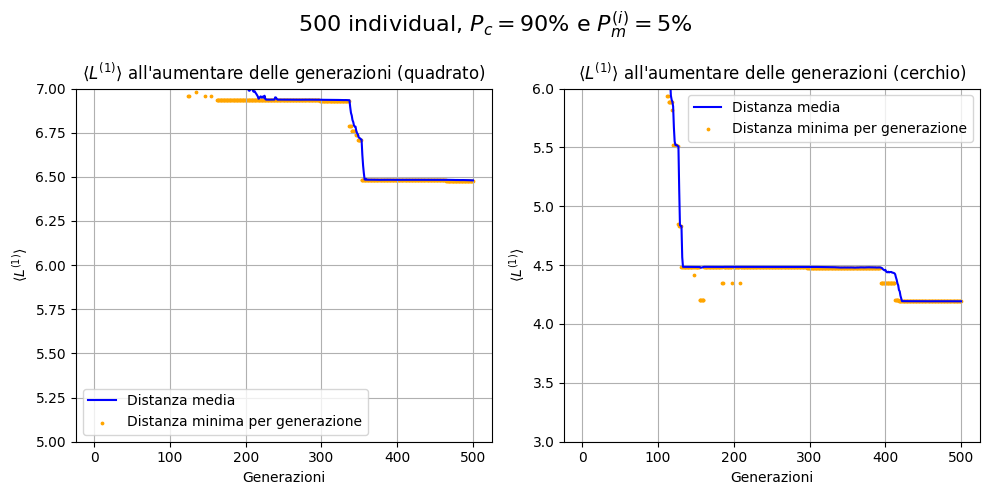

Dist min cerchio: 4.19289
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-31-25-9-33-32-20-34-16-6-18-28-27-5-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 6.47751
Sequenza: 1-12-15-34-26-10-11-24-8-9-28-27-29-19-33-2-14-3-16-25-5-6-13-17-22-23-32-4-7-30-21-20-31-18-1


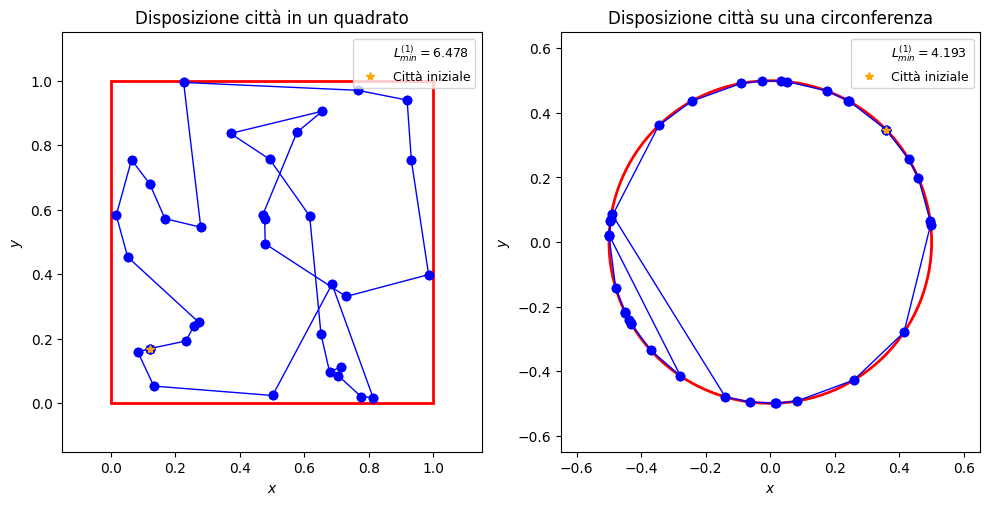

In [19]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm5Pc90I500_c = np.loadtxt("./data_pm5_pc90_I500/Circle/Distances.dat", skiprows=1)
distances_Pm5Pc90I500_s = np.loadtxt("./data_pm5_pc90_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm5Pc90I500_c, distances_Pm5Pc90I500_s,"500 individual, $P_{c}=90\%$ e $P^{(i)}_m = 5 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm5Pc90I500_c = min_sequence(sequences_extractor("./data_pm5_pc90_I500/Circle/minSequences.dat"))
min_seq_Pm5Pc90I500_s = min_sequence(sequences_extractor("./data_pm5_pc90_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm5Pc90I500_c, min_seq_Pm5Pc90I500_s)

Come prevedibile dopo i risultati precedenti, la situazione è ulteriormente peggiorata. Dalle distanze ottenute (e dalle configurazioni rappresentate) si può osservare che il sistema non è riuscito a convergere entro lo stesso numero di generazioni.

Dai risultati ottenuti, si evince che ridurre la probabilità di mutazione rallenta la convergenza. Ciò potrebbe essere dovuto al fatto che le mutazioni sono in grado di esplorare nuove sequenze, non raggiungibili da puri accoppiamenti tra sequenze (una sequenza di "geni" sbagliata viene comunque tramandata).

Per verificare il miglior peso da dare al crossover viene ora variata la sua probabilità $p_{c}$, prima ridotta all'$80\%$ e poi aumentata al $95\%$, mantenendo $p_{m}=10\%$.

Dist min cerchio: 3.12153
Dist min quadrato: 5.24719


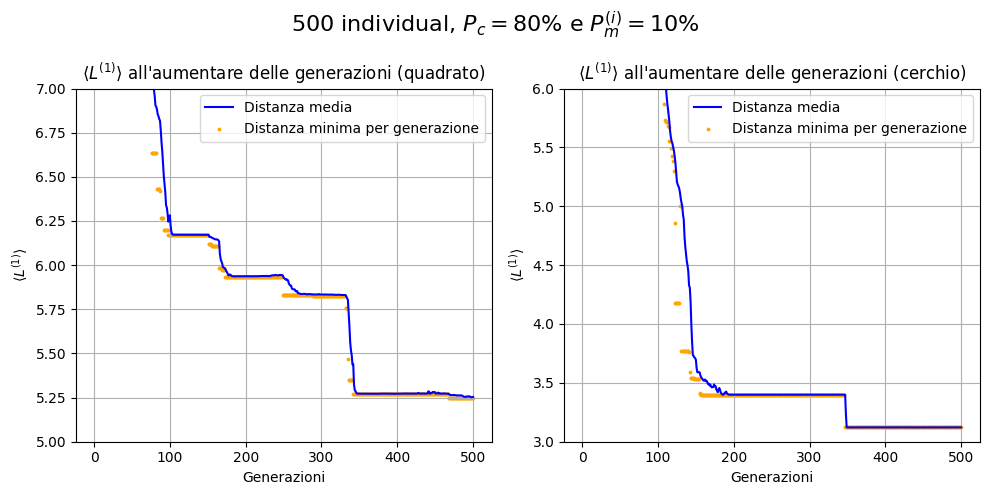

Dist min cerchio: 3.12153
Sequenza: 1-15-2-24-23-30-29-17-4-11-31-5-27-25-28-18-6-16-34-20-32-33-9-7-3-22-26-13-12-10-19-14-21-8-1
Dist min quadrato: 5.24719
Sequenza: 1-26-10-8-9-24-11-28-6-13-25-5-27-29-19-33-16-3-14-17-21-2-22-32-30-7-4-23-20-34-15-12-31-18-1


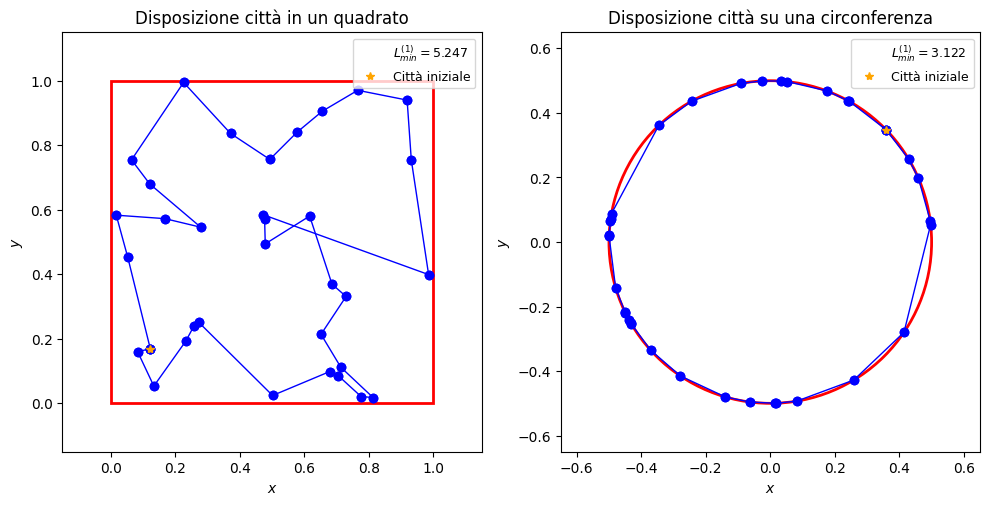

In [33]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm10Pc80I500_c = np.loadtxt("./data_pm10_pc80_I500/Circle/Distances.dat", skiprows=1)
distances_Pm10Pc80I500_s = np.loadtxt("./data_pm10_pc80_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm10Pc80I500_c, distances_Pm10Pc80I500_s,"500 individual, $P_{c}=80\%$ e $P^{(i)}_m = 10 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm10Pc80I500_c = min_sequence(sequences_extractor("./data_pm10_pc80_I500/Circle/minSequences.dat"))
min_seq_Pm10Pc80I500_s = min_sequence(sequences_extractor("./data_pm10_pc80_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm10Pc80I500_c, min_seq_Pm10Pc80I500_s)

In questo primo caso si nota che il sistema è riuscito a convergere nel caso di disposizione a cerchio (ma con un numero di generazioni superiore al caso di $p_c=90\%$), ma non ci è riuscito nel caso del quadrato.

Dist min cerchio: 5.12491
Dist min quadrato: 5.08502


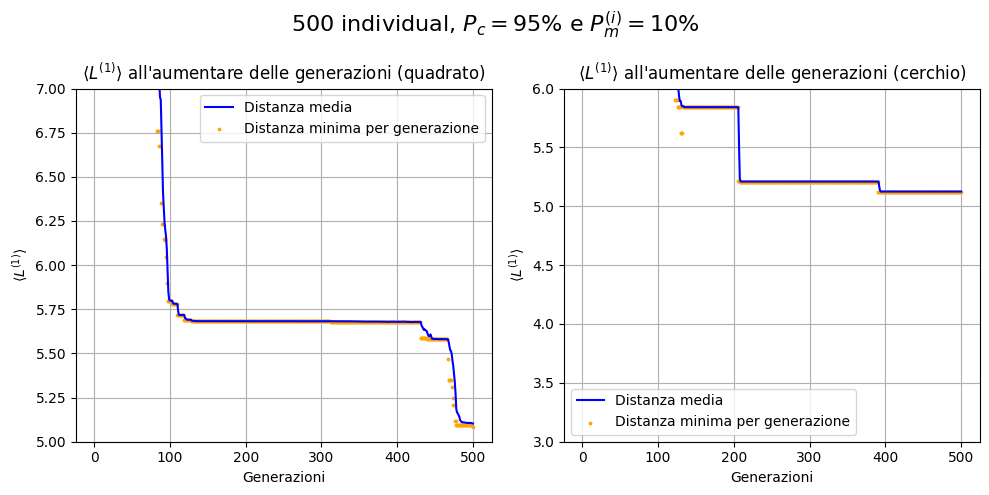

Dist min cerchio: 5.12491
Sequenza: 1-8-21-14-19-10-12-13-26-9-7-3-22-32-20-16-6-18-28-34-33-25-27-5-31-11-4-15-2-24-23-30-29-17-1
Dist min quadrato: 5.08502
Sequenza: 1-12-15-34-26-10-11-24-8-9-14-3-16-17-13-6-28-25-5-27-29-19-33-2-21-22-23-32-4-30-7-20-31-18-1


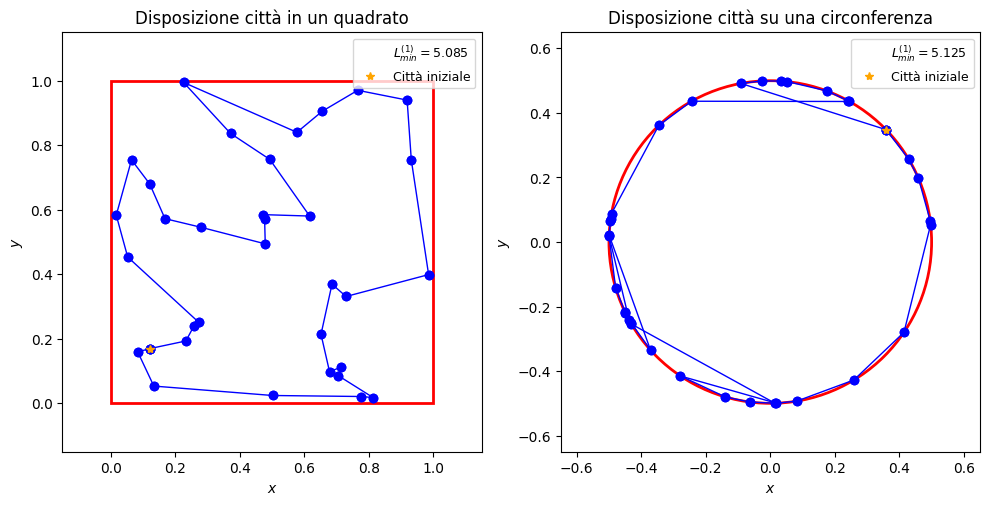

In [34]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm10Pc95I500_c = np.loadtxt("./data_pm10_pc95_I500/Circle/Distances.dat", skiprows=1)
distances_Pm10Pc95I500_s = np.loadtxt("./data_pm10_pc95_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm10Pc95I500_c, distances_Pm10Pc95I500_s,"500 individual, $P_{c}=95\%$ e $P^{(i)}_m = 10 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm10Pc95I500_c = min_sequence(sequences_extractor("./data_pm10_pc95_I500/Circle/minSequences.dat"))
min_seq_Pm10Pc95I500_s = min_sequence(sequences_extractor("./data_pm10_pc95_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm10Pc95I500_c, min_seq_Pm10Pc95I500_s)

In questo caso è interessante notare come la configurazione sul cerchio sia molto lontana dal minimo, mentre quella nel quadrato è vicina, tuttavia quest'ultima raggiunge la convergenza in quasi il doppio delle generazioni del caso $p_{m}=10\%$ e $p_c=90\%$.

L'ultima prova prima di aumentare gli individui di ogni popolazione viene svolta sempre con $p_{c}=80\%$ e $p_c=95\%$ ma con $p_{m}=20\%$, ovvero la probabilità di mutazione con cui si è trovato il miglior valore di distanza minima.

Dist min cerchio: 3.12153
Dist min quadrato: 5.09719


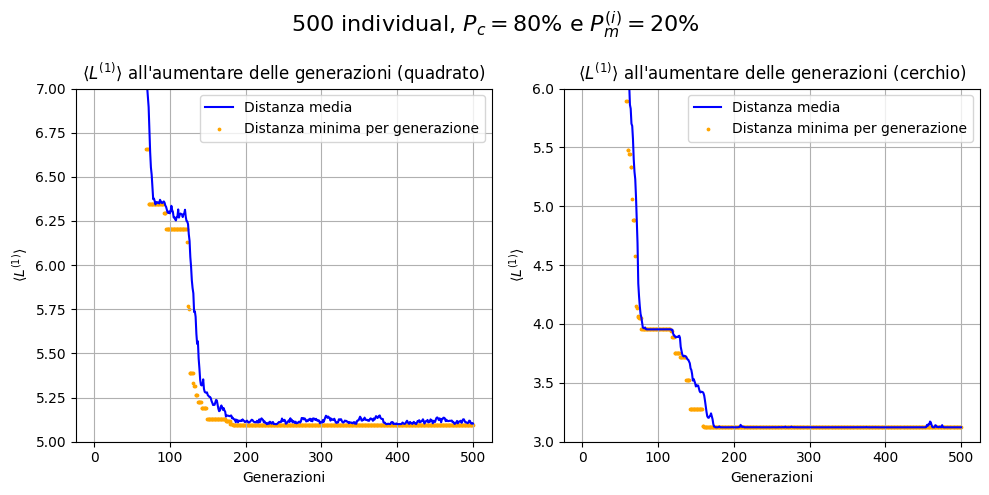

Dist min cerchio: 3.12153
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-32-20-34-16-6-18-28-25-27-5-31-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 5.09719
Sequenza: 1-26-10-8-24-11-28-6-13-25-5-27-29-19-33-30-7-4-32-23-20-22-2-21-17-16-3-14-9-34-15-12-31-18-1


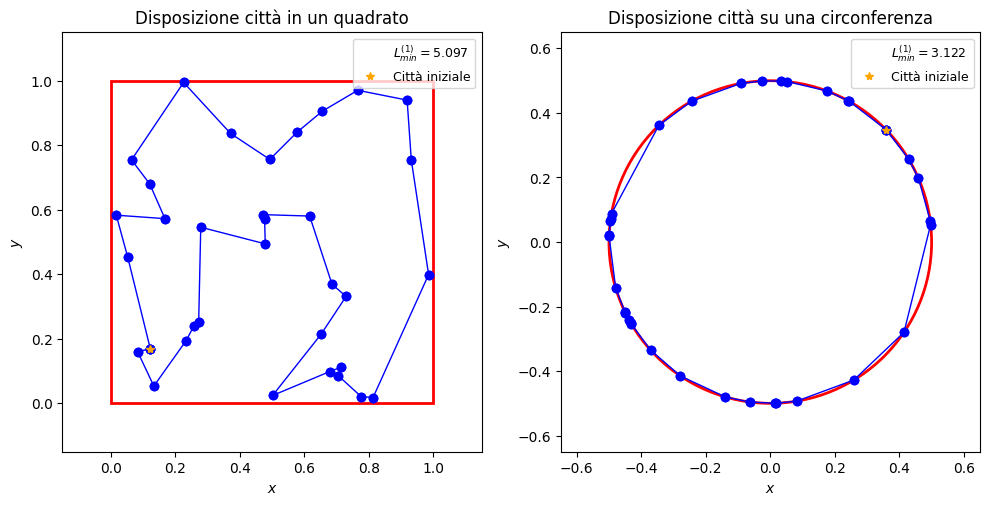

In [35]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc80I500_c = np.loadtxt("./data_pm20_pc80_I500/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc80I500_s = np.loadtxt("./data_pm20_pc80_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc80I500_c, distances_Pm20Pc80I500_s,"500 individual, $P_{c}=80\%$ e $P^{(i)}_m = 20 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc80I500_c = min_sequence(sequences_extractor("./data_pm20_pc80_I500/Circle/minSequences.dat"))
min_seq_Pm20Pc80I500_s = min_sequence(sequences_extractor("./data_pm20_pc80_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc80I500_c, min_seq_Pm20Pc80I500_s)

Si può notare che con questa configurazione entrambi i casi hanno ridotto il tempo di convergenza di una cinquantina di generazioni, lasciando pressoché uguali i valori di distanza minima.

Dist min cerchio: 3.12153
Dist min quadrato: 5.45018


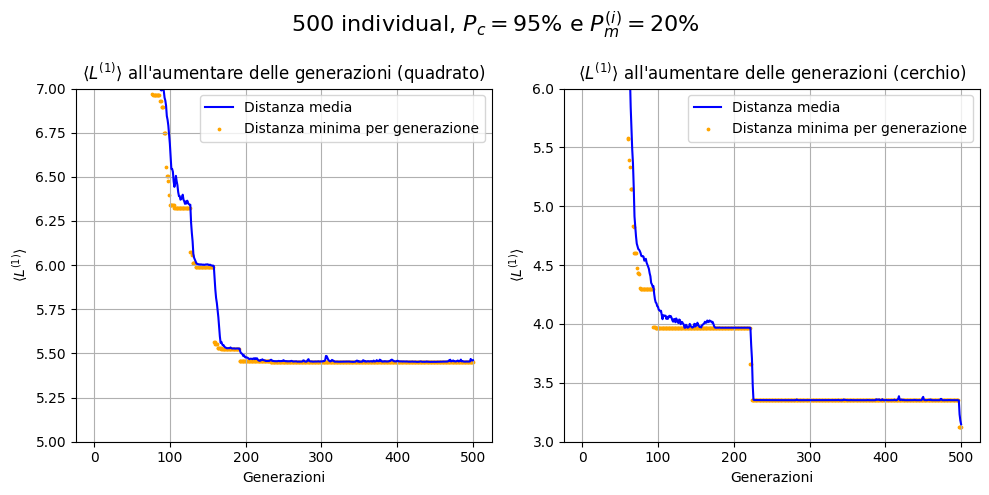

Dist min cerchio: 3.12153
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-32-20-34-16-6-18-28-25-27-5-31-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 5.45018
Sequenza: 1-12-15-34-26-10-11-28-24-8-9-14-3-16-13-6-25-5-27-29-19-17-21-2-33-30-7-4-32-23-22-20-31-18-1


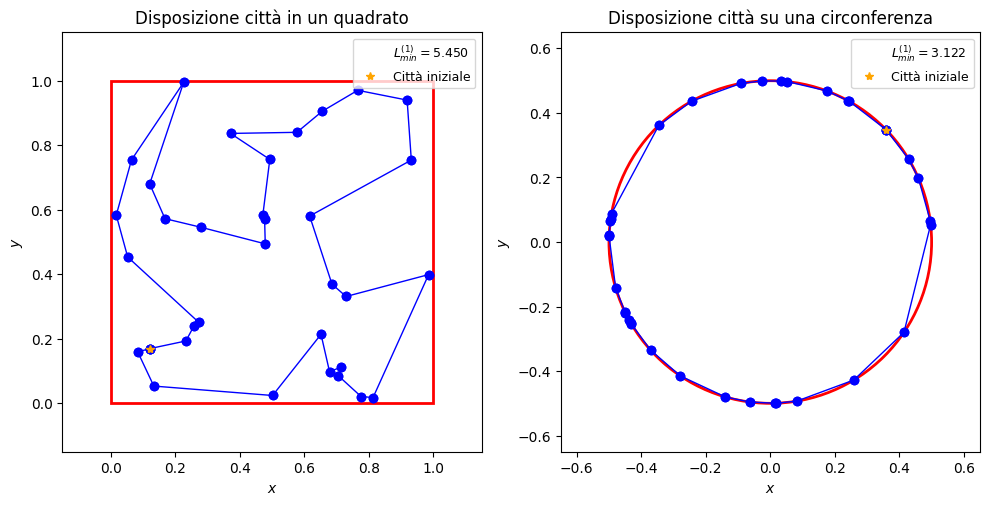

In [36]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc95I500_c = np.loadtxt("./data_pm20_pc95_I500/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc95I500_s = np.loadtxt("./data_pm20_pc95_I500/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc95I500_c, distances_Pm20Pc95I500_s,"500 individual, $P_{c}=95\%$ e $P^{(i)}_m = 20 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc95I500_c = min_sequence(sequences_extractor("./data_pm20_pc95_I500/Circle/minSequences.dat"))
min_seq_Pm20Pc95I500_s = min_sequence(sequences_extractor("./data_pm20_pc95_I500/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc95I500_c, min_seq_Pm20Pc95I500_s)

Alzando la probabilità di crossover, il caso del cerchio converge allo stesso valore trovato in precendenza ma in molte più generazioni, mentre nel caso del quadrato si ottiene una distanza più elevata.

Da tutti i test svolti finora risulta che la il compromesso migliore tra risultato di distanza e velocità di convergenza si ha per $p_{m}=20\%$ e $p_c=80\%$.

Mantenendo queste probabilità, si mostrano ora i risultati ottenuti incrementando il numero di individui a $1000$, per la quale ovviamente il tempo di esecuzione dell'algoritmo viene incrementato notevolmente.

Dist min cerchio: 3.12153
Dist min quadrato: 5.1334


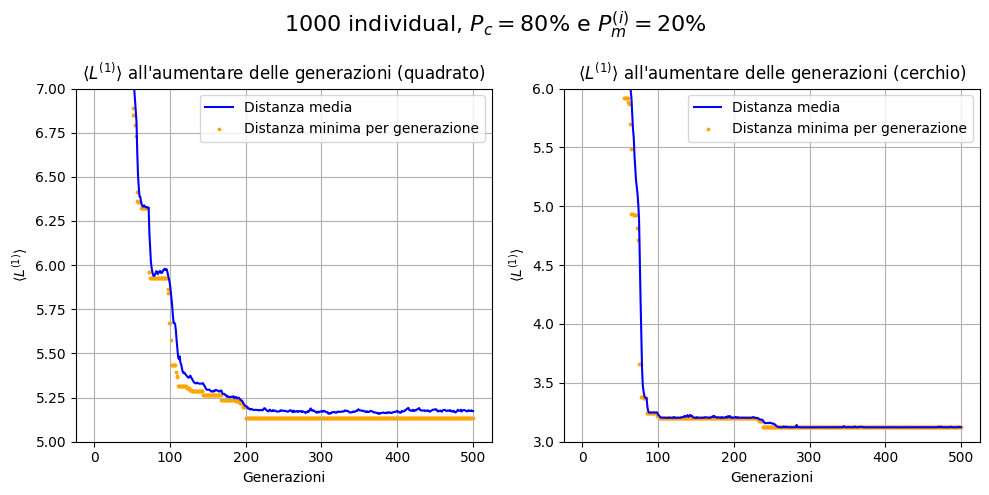

Dist min cerchio: 3.12153
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-32-20-34-16-6-18-28-25-27-5-31-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 5.1334
Sequenza: 1-12-15-34-9-8-26-10-24-11-28-6-13-25-5-27-29-19-17-16-3-14-21-2-33-30-7-4-32-23-22-20-31-18-1


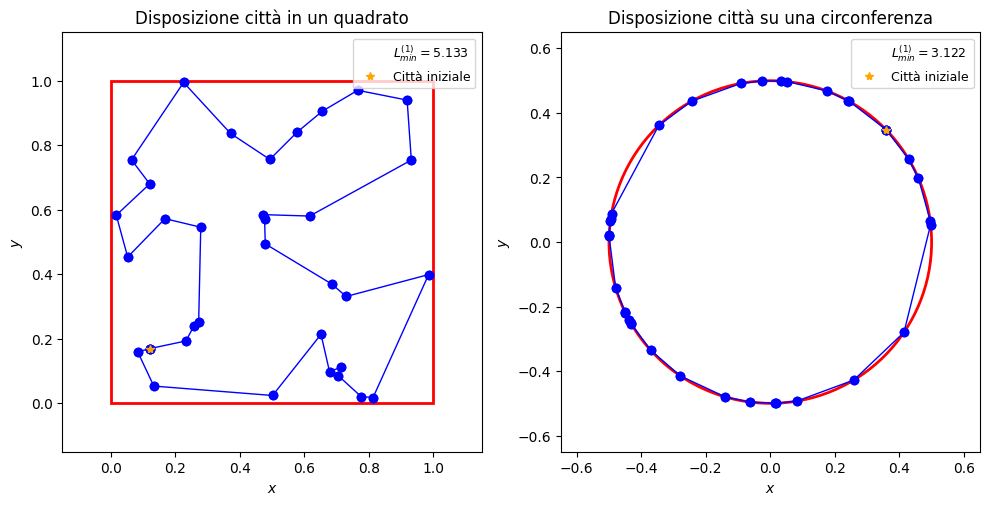

In [37]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc80I1k_c = np.loadtxt("./data_pm20_pc80_I1k/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc80I1k_s = np.loadtxt("./data_pm20_pc80_I1k/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc80I1k_c, distances_Pm20Pc80I1k_s,"1000 individual, $P_{c}=80\%$ e $P^{(i)}_m = 20 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc80I1k_c = min_sequence(sequences_extractor("./data_pm20_pc80_I1k/Circle/minSequences.dat"))
min_seq_Pm20Pc80I1k_s = min_sequence(sequences_extractor("./data_pm20_pc80_I1k/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc80I1k_c, min_seq_Pm20Pc80I1k_s)

Rispetto al caso di $500$ individual, la velocità di convergenza è leggermente aumentata, e nel caso di configurazioni nel quadrato si è raggiunta una distanza superiore alla minima finora trovata ($5.073$). Il numero di individui maggiore comporta una maggior varietà di "genomi", quindi probabilmente ciò rende più difficile alle sequenze vincenti di imporsi nelle generazioni successive. Incrementando la probabilità di crossover si potrebbe aumentare questa "selezionabilità" delle buone sequenze. Di seguito vengono dunque mostrati i risultati con $p_{c}=95\%$.

Dist min cerchio: 3.12153
Dist min quadrato: 5.08502


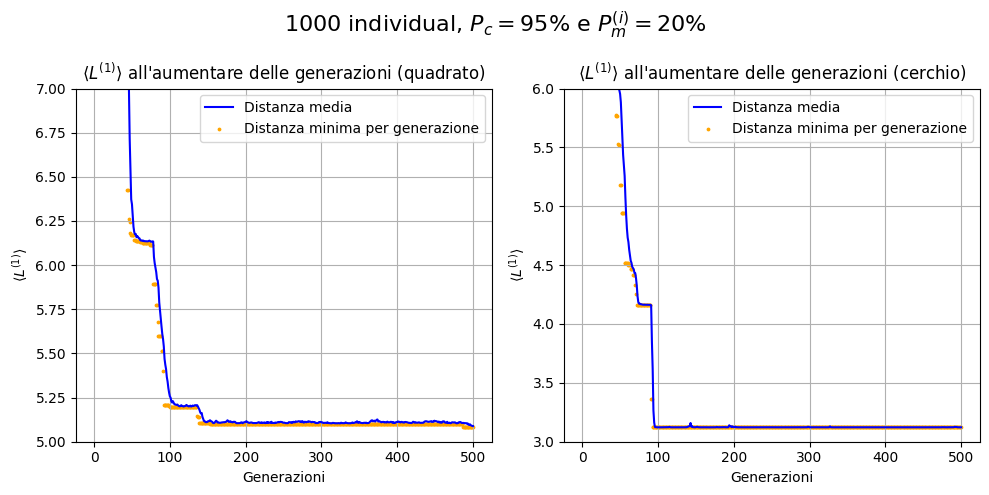

Dist min cerchio: 3.12153
Sequenza: 1-8-21-14-19-10-12-13-26-22-3-7-9-33-32-20-34-16-6-18-28-25-27-5-31-11-4-17-29-30-23-24-2-15-1
Dist min quadrato: 5.08502
Sequenza: 1-12-15-34-26-10-11-24-8-9-14-3-16-17-13-6-28-25-5-27-29-19-33-2-21-22-23-32-4-30-7-20-31-18-1


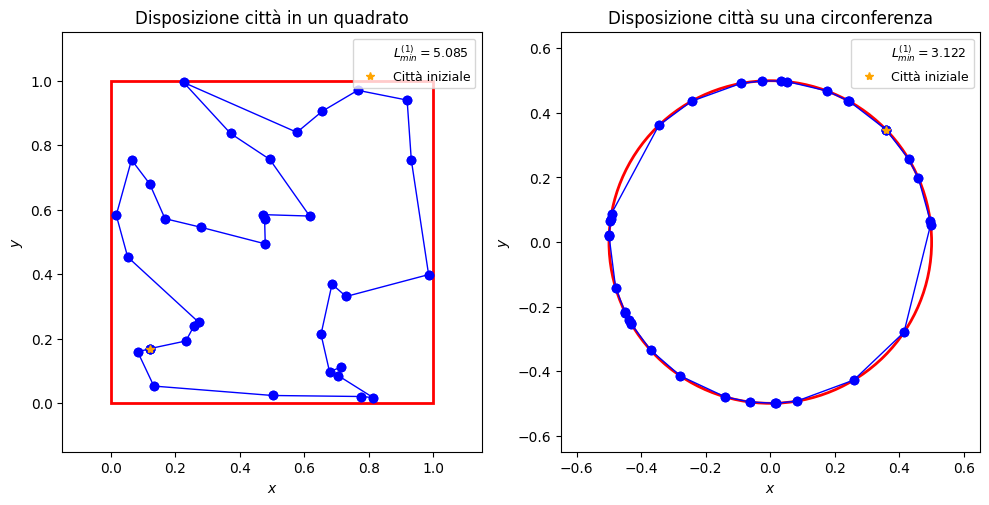

In [38]:
# Carico indice e coordinate per ogni città nelle due configurazioni, nel quadrato e sulla circonferenza
distances_Pm20Pc95I1k_c = np.loadtxt("./data_pm20_pc95_I1k/Circle/Distances.dat", skiprows=1)
distances_Pm20Pc95I1k_s = np.loadtxt("./data_pm20_pc95_I1k/Square/Distances.dat", skiprows=1)

PlotAveDist(distances_Pm20Pc95I1k_c, distances_Pm20Pc95I1k_s,"1000 individual, $P_{c}=95\%$ e $P^{(i)}_m = 20 \%$")

# ottengo le distanze minime con relative sequenze
min_seq_Pm20Pc95I1k_c = min_sequence(sequences_extractor("./data_pm20_pc95_I1k/Circle/minSequences.dat"))
min_seq_Pm20Pc95I1k_s = min_sequence(sequences_extractor("./data_pm20_pc95_I1k/Square/minSequences.dat"), 0)

# disegno i percorsi ottenuti dall'algoritmo che minimizzano le distanze
path_plotter(min_seq_Pm20Pc95I1k_c, min_seq_Pm20Pc95I1k_s)

Come previsto, aumentando il contributo del crossover la velocità di convergenza si è ridotta, specialmente nel caso del cerchio in cui si è praticamente dimezzata. Nel caso del quadrato si nota che il risultato finale proposto è stato ottenuto verso le ultime generazioni (dopo cica 500), ma già dopo circa $150$ le configurazioni proposte hanno una lunghezza di circa $5.1$, che è comunque buona data la rapidità di convergenza ottenuta.

### Animazione dei risultati
A puro scopo ludico, vengono qui mostrate le animazioni dei risultati, ovvero per entrambe le forme viene mostrata l'evoluzione delle sequenze minime selezionate dall'algoritmo al variare delle generazioni. Le simulazioni sono estratte dall'ultimo caso trattato, con $1000$ individui, $p_m=20\%$ e $p_c=95\%$, mostrando per brevità solamente l'evoluzione delle prime $150$ generazioni (quindi le ultime sequenze non sono le minime estratte).

Il codice delle animazioni mostrate è disponibile nel file "./TSP_animation.py".

In [39]:
from IPython.display import Video

video_circle_path = './TSP_animation/CircleAnimation.mp4'

Video(video_circle_path)

In [40]:
from IPython.display import Video

video_square_path = './TSP_animation/SquareAnimation.mp4'
Video(video_square_path)